# Описалово

# 0. Подготовительные шаги и функции  
Загружаю библиотеки и объявляю константы

In [61]:
import pandas as pd
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean 
import math
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandartScaler

RANDOM_STATE = 42
DF_NAMES = ['df_cow', 'df_main', 'df_dad']

COW_CAT_COL = {'breed':'Порода', 'pasture_type':'Тип пастбища', 'breed_dad':'Порода отца', 'dad_name':'Кличка отца', 'age':'Возраст'}
MAIN_CAT_COL = {'breed':'Порода', 'pasture_type':'Тип пастбища', 'breed_dad':'Порода отца', 'taste':'Вкус', 'age':'Возраст'}
DAD_CAT_COL = {'name':'Кличка'}

COW_NUM_COL = {'fat_per':'Процент жирности', 'protein_per':'Проценты белка'}
MAIN_NUM_COL = {'yield':'Удой', 'eke':'Энергетическая кормовая единица', 'protein_weight':'Содержание сырого протеина в корме (г.)', 'spo':'Сахаро-протеиновое соотношение', 'fat_per':'Процент жирности', 'protein_per':'Процент белка'}


# 1. Предобработка данных

## Преамбула  
### Для выполнения задачи заказчиком были переданы три набора данных  
 - ferma_main.csv - содержит данные о стаде на данный момент;  
 - ferma_dad.csv - содержит клички быков родителей каждой коровы в стаде фермера;  
 - cow_buy.csv - данне о коровах "ЭкоФермы" предложенных к покупке заказчиком;  
 В ходе дальнейших действий я произведу манипуляции с данными подготавливая их для дальнейших операций.

#### Загружаю данные из файлов в датафреймы. Т.к. работу выполнял локально добавил проверку.

In [62]:
try:
    df_cow=pd.read_csv('c:/ps/project/happy_farm/data/cow_buy.csv', sep=';', decimal=",")
    df_main=pd.read_csv('c:/ps/project/happy_farm/data/ferma_main.csv', sep=';', decimal=",")
    df_dad=pd.read_csv('c:/ps/project/happy_farm/data/ferma_dad.csv', sep=';', decimal=",")
except:
    df_cow=pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=",")
    df_main=pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=",")
    df_dad=pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=",")

В файлах использовался не стандартный разделитель, пришлось добавить разделитель. Указал разделитель для дробных данных, чтобы иметь возможность их корректно обрабатывать.

#### Проанализирую содержимое таблиц и тип хранимых данных.

##### Выведу пять случайных строк каждой таблицы, чтобы посмотреть на их содержимое.

In [63]:
display(df_cow.sample(5))
display(df_main.sample(5))
display(df_dad.sample(5))

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
427,428,6852,16.6,2338,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.72,3.076,вкусно,более_2_лет
72,73,5718,13.7,2212,0.895,РефлешнСоверинг,Холмистое,Айдиалл,3.61,3.077,вкусно,более_2_лет
615,616,6805,14.9,1863,0.930,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,не вкусно,более_2_лет
458,459,5806,13.1,1810,0.880,Вис Бик Айдиал,Равнинное,Айдиал,3.61,3.073,вкусно,более_2_лет
414,415,6293,13.5,2249,0.940,Вис Бик Айдиал,Холмистое,Айдиал,3.59,3.079,вкусно,более_2_лет


,id,Имя Папы
352,353,Буйный
408,409,Геркулес
455,456,Геркулес
605,606,Соловчик
189,190,Барин


##### Посмотрю соответствие типов столбцов описанным в задаче типам.

In [64]:
display(df_cow.info(True))
display(df_main.info(True))
display(df_dad.info(True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

Можно заметить, что пропусков в столбцах нет.  
Формат столбцов не соответствует хранимым в них данным. Именование столбцов тоже мне не подходят. Изменю тип даннх столбцов немного позже - после переименования столбцов.

#### Проверю именование столбцов

In [65]:
display('COW - table')
display(df_cow.columns.tolist())
display('MAIN - table')
display(df_main.columns.tolist())
display('DAD - table')
display(df_dad.columns.tolist())

'COW - table'

['Порода',
 'Тип пастбища',
 'порода папы_быка',
 'Имя_папы',
 'Текущая_жирность,%',
 'Текущий_уровень_белок,%',
 'Возраст']

'MAIN - table'

['id',
 'Удой, кг',
 'ЭКЕ (Энергетическая кормовая единица)',
 'Сырой протеин, г',
 'СПО (Сахаро-протеиновое соотношение)',
 'Порода',
 'Тип пастбища',
 'порода папы_быка',
 'Жирность,%',
 'Белок,%',
 'Вкус молока',
 'Возраст']

'DAD - table'

['id', 'Имя Папы']

Именование столбцов не соттветсвует требованиям. Переименовываю.

In [66]:
df_cow.columns = ['breed',
                  'pasture_type',
                  'breed_dad',
                  'dad_name',
                  'fat_per',
                  'protein_per',
                  'age']
df_main.columns = ['id',
                   'yield',
                   'eke',
                   'protein_weight',
                   'spo',
                   'breed',
                   'pasture_type',
                   'breed_dad',
                   'fat_per',
                   'protein_per',
                   'taste',
                   'age']
df_dad.columns = ['id', 
                  'name']



#### Меняю тип данных столбцов в соответствии с таблицей:  

**df_cow**
| Имя столбца    | Тип данных  | Новый тип данных |
|:---------------|:-----------:|:----------------:|
| breed          | object      | object           |
| pasture_type   | object      | object           |
| breed_dad      | object      | object           |
| dad_name       | object      | object           |
| fat_per        | object      | float64          |
| protein_per    | object      | float64          |
| age            | object      | object           |  

**df_main**
| Имя столбца    | Тип данных  | Новый тип данных |
|:---------------|:-----------:|:----------------:|
| id             | int64       | int64            |
| yield          | int64       | int64            |
| eke            | object      | float64          |
| protein_weight | int64       | int64            |
| spo            | object      | float64          |
| breed          | object      | object           |
| pasture_type   | object      | object           |
| breed_dad      | object      | object           |
| fat_per        | object      | float64          |
| protein_per    | object      | float64          |
| taste          | object      | object           |
| age            | object      | object           |  

**df_dad**
| Имя столбца    | Тип данных  | Новый тип данных |
|:---------------|:-----------:|:----------------:|
| id             | object      | int64            |
| name           | object      | object           |

In [67]:
df_cow = df_cow.astype({
    'fat_per': float,
    'protein_per': float
    
})

df_main = df_main.astype({
    'eke': float,
    'spo': float,
    'fat_per': float,
    'protein_per': float
})

df_dad = df_dad.astype({
    'id': float    
})

#### Проверю таблицы на дубликаты

##### Выведу список явных дубликатов

In [68]:
for d in DF_NAMES:
    print(f'В {d} найдено дубликатов: {globals()[d].duplicated().sum()}')

В df_cow найдено дубликатов: 4
В df_main найдено дубликатов: 5
В df_dad найдено дубликатов: 0


###### Удаляю явные дубликаты

In [69]:
for d in DF_NAMES:
    globals()[d] = globals()[d].drop_duplicates()

##### Проверю на наличие неявных дубликатов у нечисловых столбцов

In [70]:
for d in DF_NAMES:
    if 'cow' in d: c_a = COW_CAT_COL.keys()
    if 'main' in d: c_a = MAIN_CAT_COL.keys()
    if 'dad' in d: c_a = DAD_CAT_COL.keys()
    for c in c_a:    
        print(f'Список уникальных значений таблицы {d} столбца {c}: {globals()[d][c].unique()}')

Список уникальных значений таблицы df_cow столбца breed: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Список уникальных значений таблицы df_cow столбца pasture_type: ['холмистое' 'равнинное']
Список уникальных значений таблицы df_cow столбца breed_dad: ['Айдиал' 'Соверин']
Список уникальных значений таблицы df_cow столбца dad_name: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
Список уникальных значений таблицы df_cow столбца age: ['более_2_лет' 'менее_2_лет']
Список уникальных значений таблицы df_main столбца breed: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Список уникальных значений таблицы df_main столбца pasture_type: ['Равнинное' 'Равнинные' 'Холмистое']
Список уникальных значений таблицы df_main столбца breed_dad: ['Айдиал' 'Соверин' 'Айдиалл']
Список уникальных значений таблицы df_main столбца taste: ['вкусно' 'не вкусно']
Список уникальных значений таблицы df_main столбца age: ['более_2_лет' 'менее_2_лет']
Список уникальных значений таблицы df_dad столбца name: ['Буйный' 'Соловчик' 'Барин' 'Герк

Наблюдаю задвоенные значения:  
_Список уникальных значений тамблицы df_main столбца pasture_type: ['Равнинное' 'Равнинные' 'Холмистое']_   
_Список уникальных значений таблицы df_main столбца breed_dad: ['Айдиал' 'Соверин' 'Айдиалл']_
_Список уникальных значений таблицы df_cow столбца breed: ['Вис Бик Айдиал' 'РефлешнСоверинг']_
_Список уникальных значений таблицы df_main столбца breed: ['Вис Бик Айдиал' 'РефлешнСоверинг']_


Заменю **Равнинные** на **Равнинное**  
И все значения содержащие **Айдиал** на **Айдиал**

In [71]:
df_main.loc[df_main['pasture_type'] == 'Равнинные', 'pasture_type'] = 'Равнинное'
df_main.loc[df_main['breed'].str.contains('Айдиал'), 'breed'] = 'Айдиал'
df_main.loc[df_main['breed_dad'].str.contains('Айдиал'), 'breed_dad'] = 'Айдиал'
df_cow.loc[df_cow['breed'].str.contains('Айдиал'), 'breed'] = 'Айдиал'
df_cow.loc[df_cow['breed_dad'].str.contains('Айдиал'), 'breed_dad'] = 'Айдиал'

## Вывод:  
Из полученных файлов от заказчика данные были загружены в три таблицы. Именование столбцов не соответствовало требованиям для проведения дальнейших работ - исправлено. Тип данных в столбцах не соответствовал хранимым в них данным - исправлено. Явных дубликатов было единичное количество и они удалены. Дубликаты вызванные человеческим фактором исправлены.

# 2. Исследовательский анализ данных

## Преамбула

### Выведу описательную статистику по каждой таблице

In [72]:
print(f'Таблица DF_COW')
print(df_cow.describe())
print(f'Таблица DF_MAIN')
print(df_main.describe())


Таблица DF_COW
         fat_per  protein_per
count  16.000000    16.000000
mean    3.571875     3.068250
std     0.141620     0.011264
min     3.340000     3.046000
25%     3.415000     3.059500
50%     3.585000     3.073500
75%     3.692500     3.076750
max     3.770000     3.081000
Таблица DF_MAIN
              id         yield         eke  protein_weight         spo  \
count  629.00000    629.000000  629.000000      629.000000  629.000000   
mean   315.00000   6188.750397   14.543879     1923.364070    0.913116   
std    181.72094   1644.795489    1.306408      182.956251    0.032203   
min      1.00000   5204.000000   10.900000     1660.000000    0.840000   
25%    158.00000   5751.000000   13.500000     1771.000000    0.890000   
50%    315.00000   6133.000000   14.700000     1888.000000    0.930000   
75%    472.00000   6501.000000   15.600000     2062.000000    0.940000   
max    629.00000  45616.000000   16.800000     2349.000000    0.960000   

          fat_per  protein_per  

Получив описательную статистику можно заметить аномалии в удое на ферме заказчика. Скорее всего это опечатка.  

Выведу удои больше 8000 кг\год

In [73]:
display(df_main[df_main['yield'] > 8000])

,id,yield,eke,protein_weight,spo,breed,pasture_type,breed_dad,fat_per,protein_per,taste,age
16,17,45616,11.5,1675,0.93,Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


Подтвердилось. Это единичная опечатка. Удалю ее  и выведу статистику.

In [74]:
df_main = df_main.drop(df_main[df_main['yield'] > 8000].index)
df_main.describe()

,id,yield,eke,protein_weight,spo,fat_per,protein_per
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


### Построю графики

#### Категориальные пригнаки

Гистограмма распределения значений для таблицы df_cow


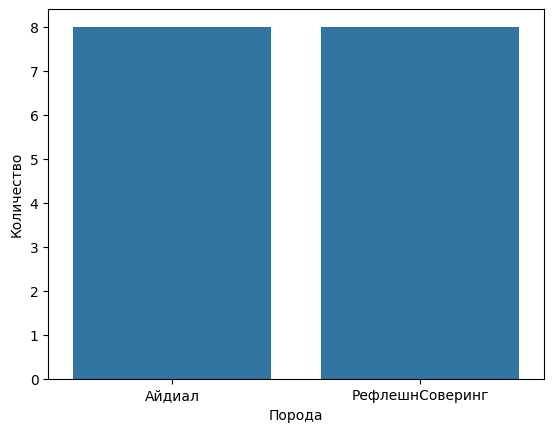

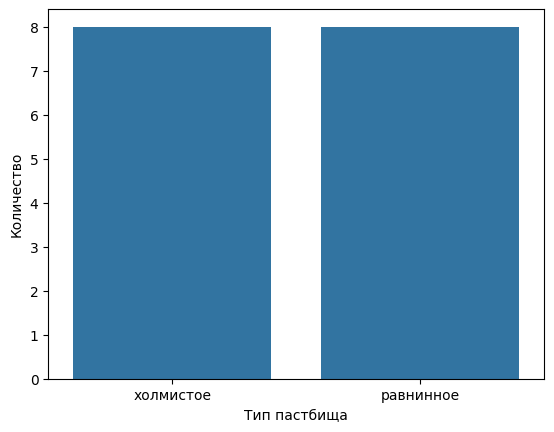

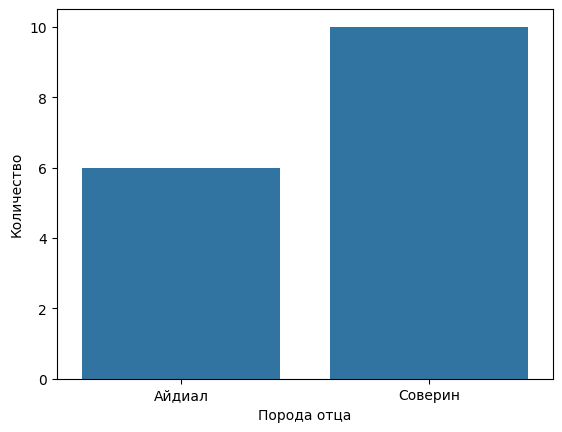

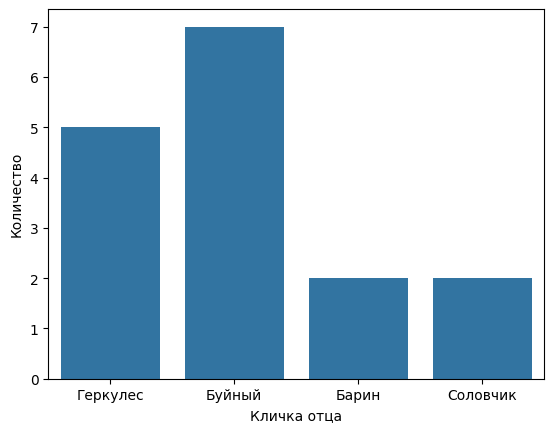

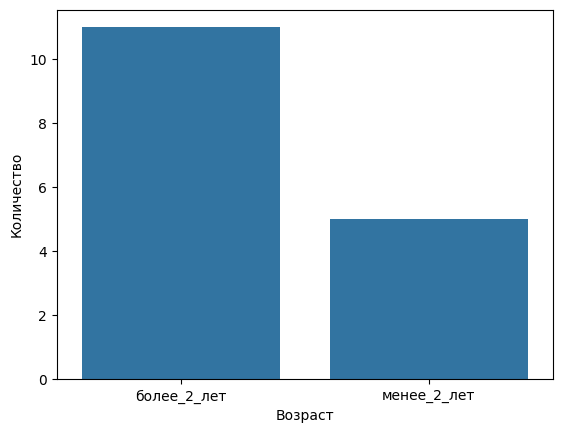

Гистограмма распределения значений для таблицы df_main


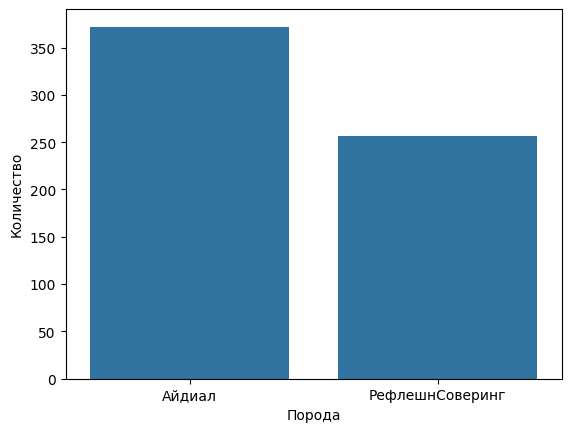

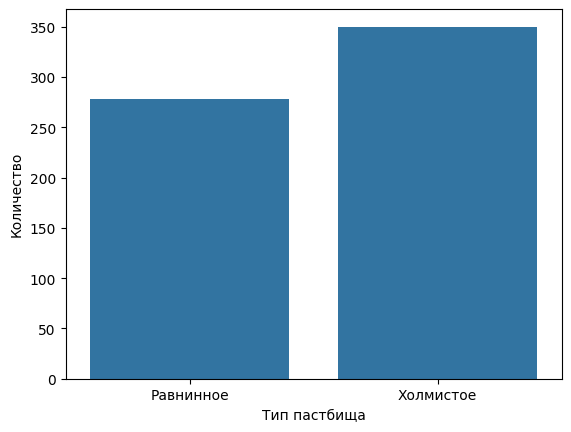

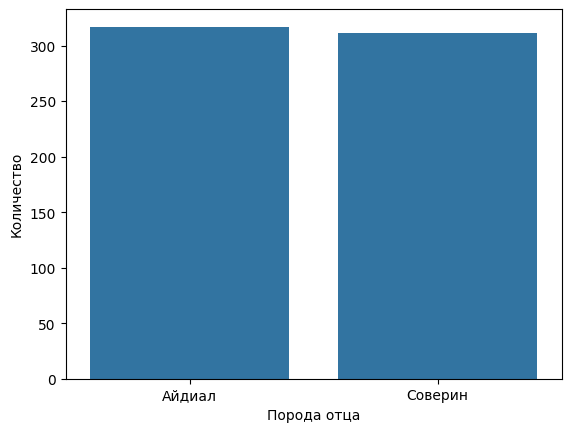

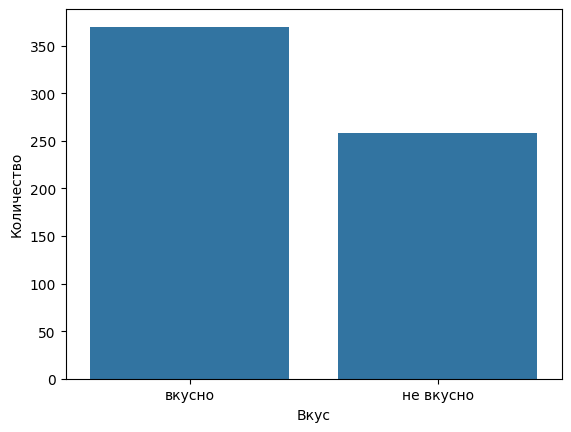

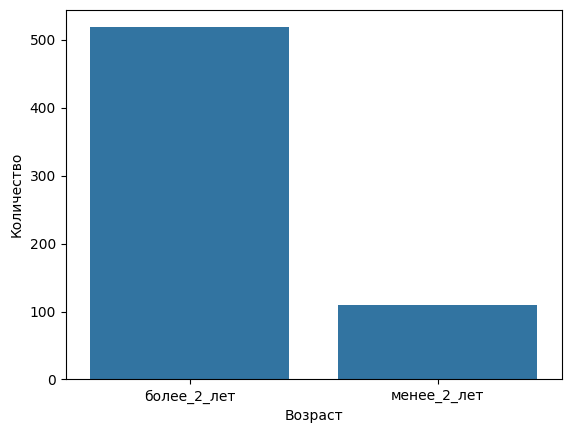

Гистограмма распределения значений для таблицы df_dad


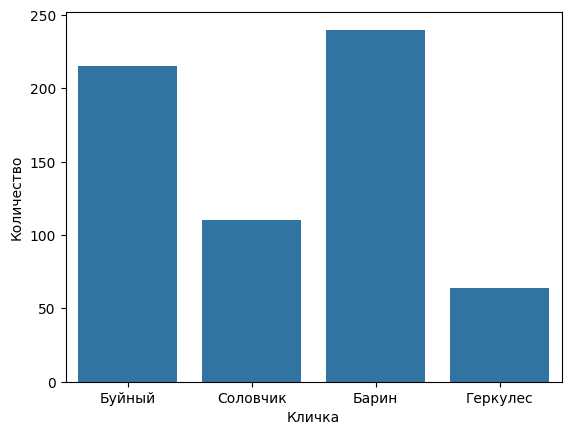

In [75]:
# для каждой таблицы создам константу содержащую перчень столбцов с категориальными признаками

for d in DF_NAMES:
    if 'cow' in d: c_a = COW_CAT_COL
    if 'main' in d: c_a = MAIN_CAT_COL
    if 'dad' in d: c_a = DAD_CAT_COL
    print(f'Гистограмма распределения значений для таблицы {d}')
    for c in c_a:
        ax = sns.countplot(x=c, data = globals()[d])
        ax.set(xlabel=c_a[c], ylabel='Количество')
        plt.show()


##### Количественные признаки

"Ящик с усами" для таблицы df_cow


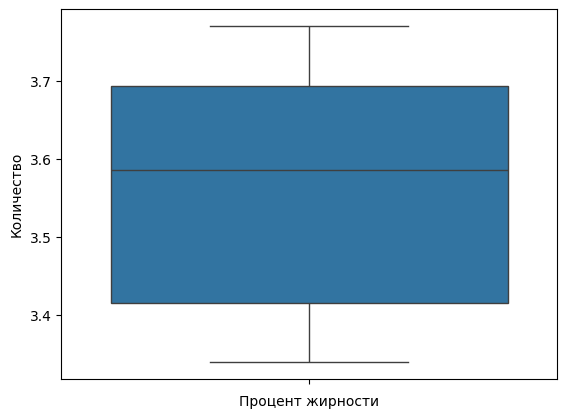

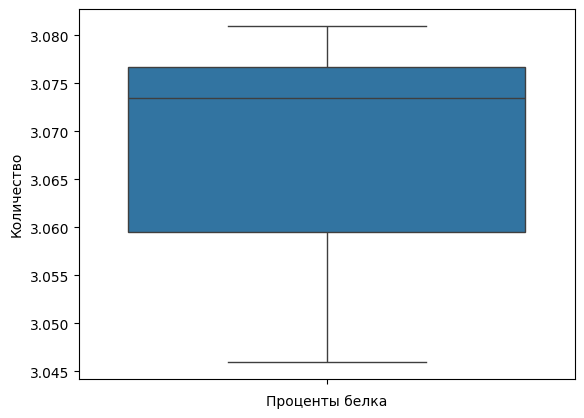

"Ящик с усами" для таблицы df_main


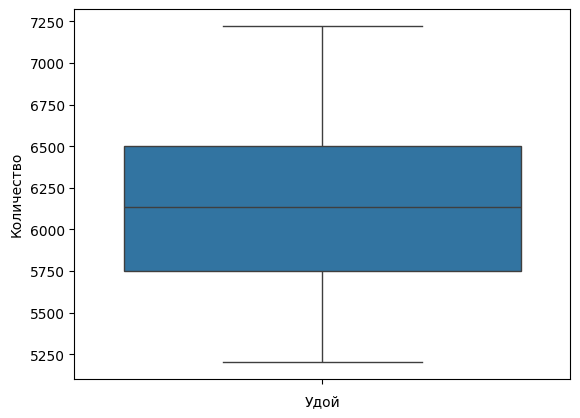

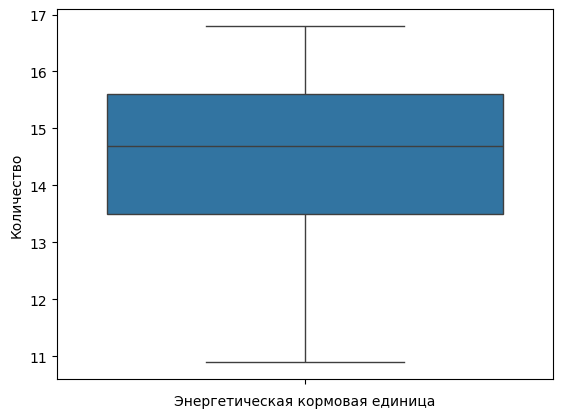

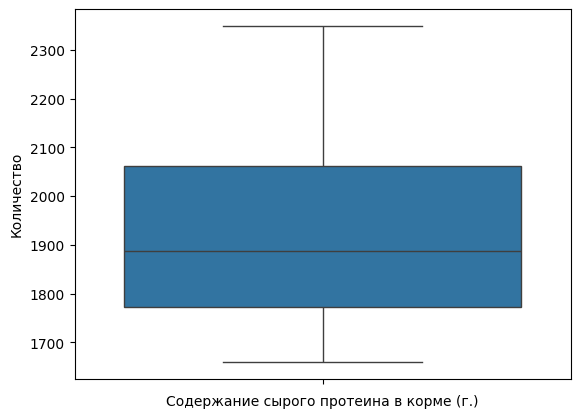

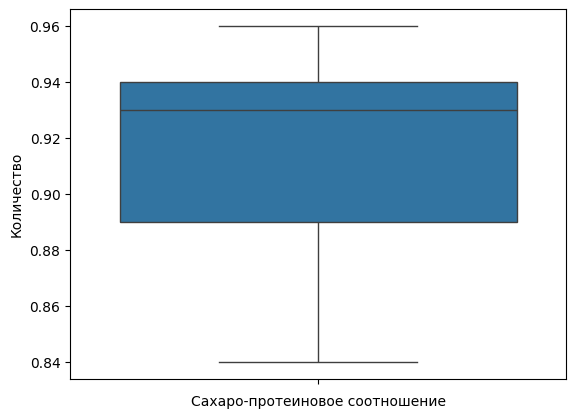

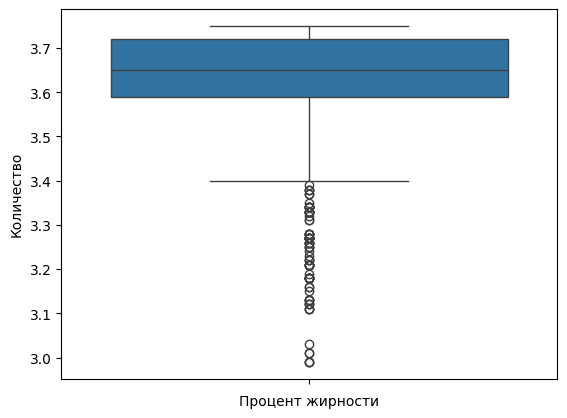

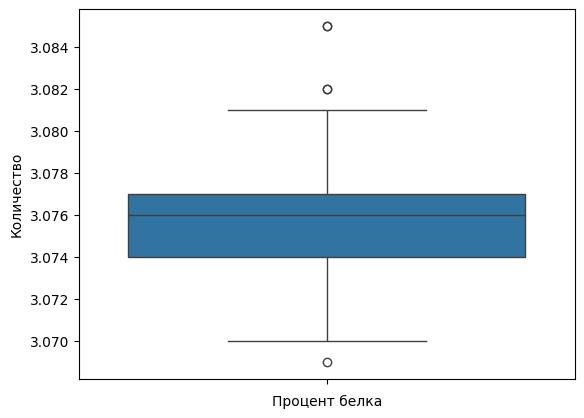

In [76]:
# для отображения количественных признаков буду использовать boxplot
for d in DF_NAMES[:2]:
    if 'cow' in d: c_a = COW_NUM_COL
    if 'main' in d: c_a = MAIN_NUM_COL
    print(f'"Ящик с усами" для таблицы {d}')
    for c in c_a:
        ax = sns.boxplot(y=c, data=globals()[d])
        ax.set(xlabel=c_a[c], ylabel='Количество')
        plt.show()        

## Вывод  

В ходе статистического анализа было выявлено одно аномальное значение и оно удалено.  
Самым неприятным, в смысле дальнейшего анализа, будет являться процент жирности из данных заказчика, в них больше всего аномальных значений меньше первого квартиля. Можно сказать, что % жирности находится в рамках 3.6-3.7, но присутствует много аномальных значений меньше. Процент белка имеет немного аномальных значений и они вряд ли сильно скажится на дальнейшей работе.


# 3. Подготовка данных к машинному обучению

## Преамбула

### Произведу расчет корреляции данных в таблице данных вермы заказчика

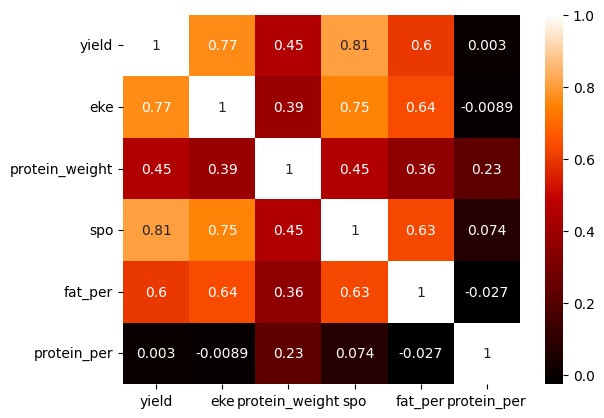

In [77]:
dataplot = sns.heatmap(df_main[MAIN_NUM_COL.keys()].corr(), cmap='gist_heat', annot=True) 

Тут наверное нужен какой-то вывод...

### Построю диаграммы рассеяния для признака "Удой", выявляя взаимосвязи с категориальными данными

C:\Users\abrik\AppData\Local\Temp\ipykernel_20012\1140216474.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout(h_pad=10,w_pad=3)


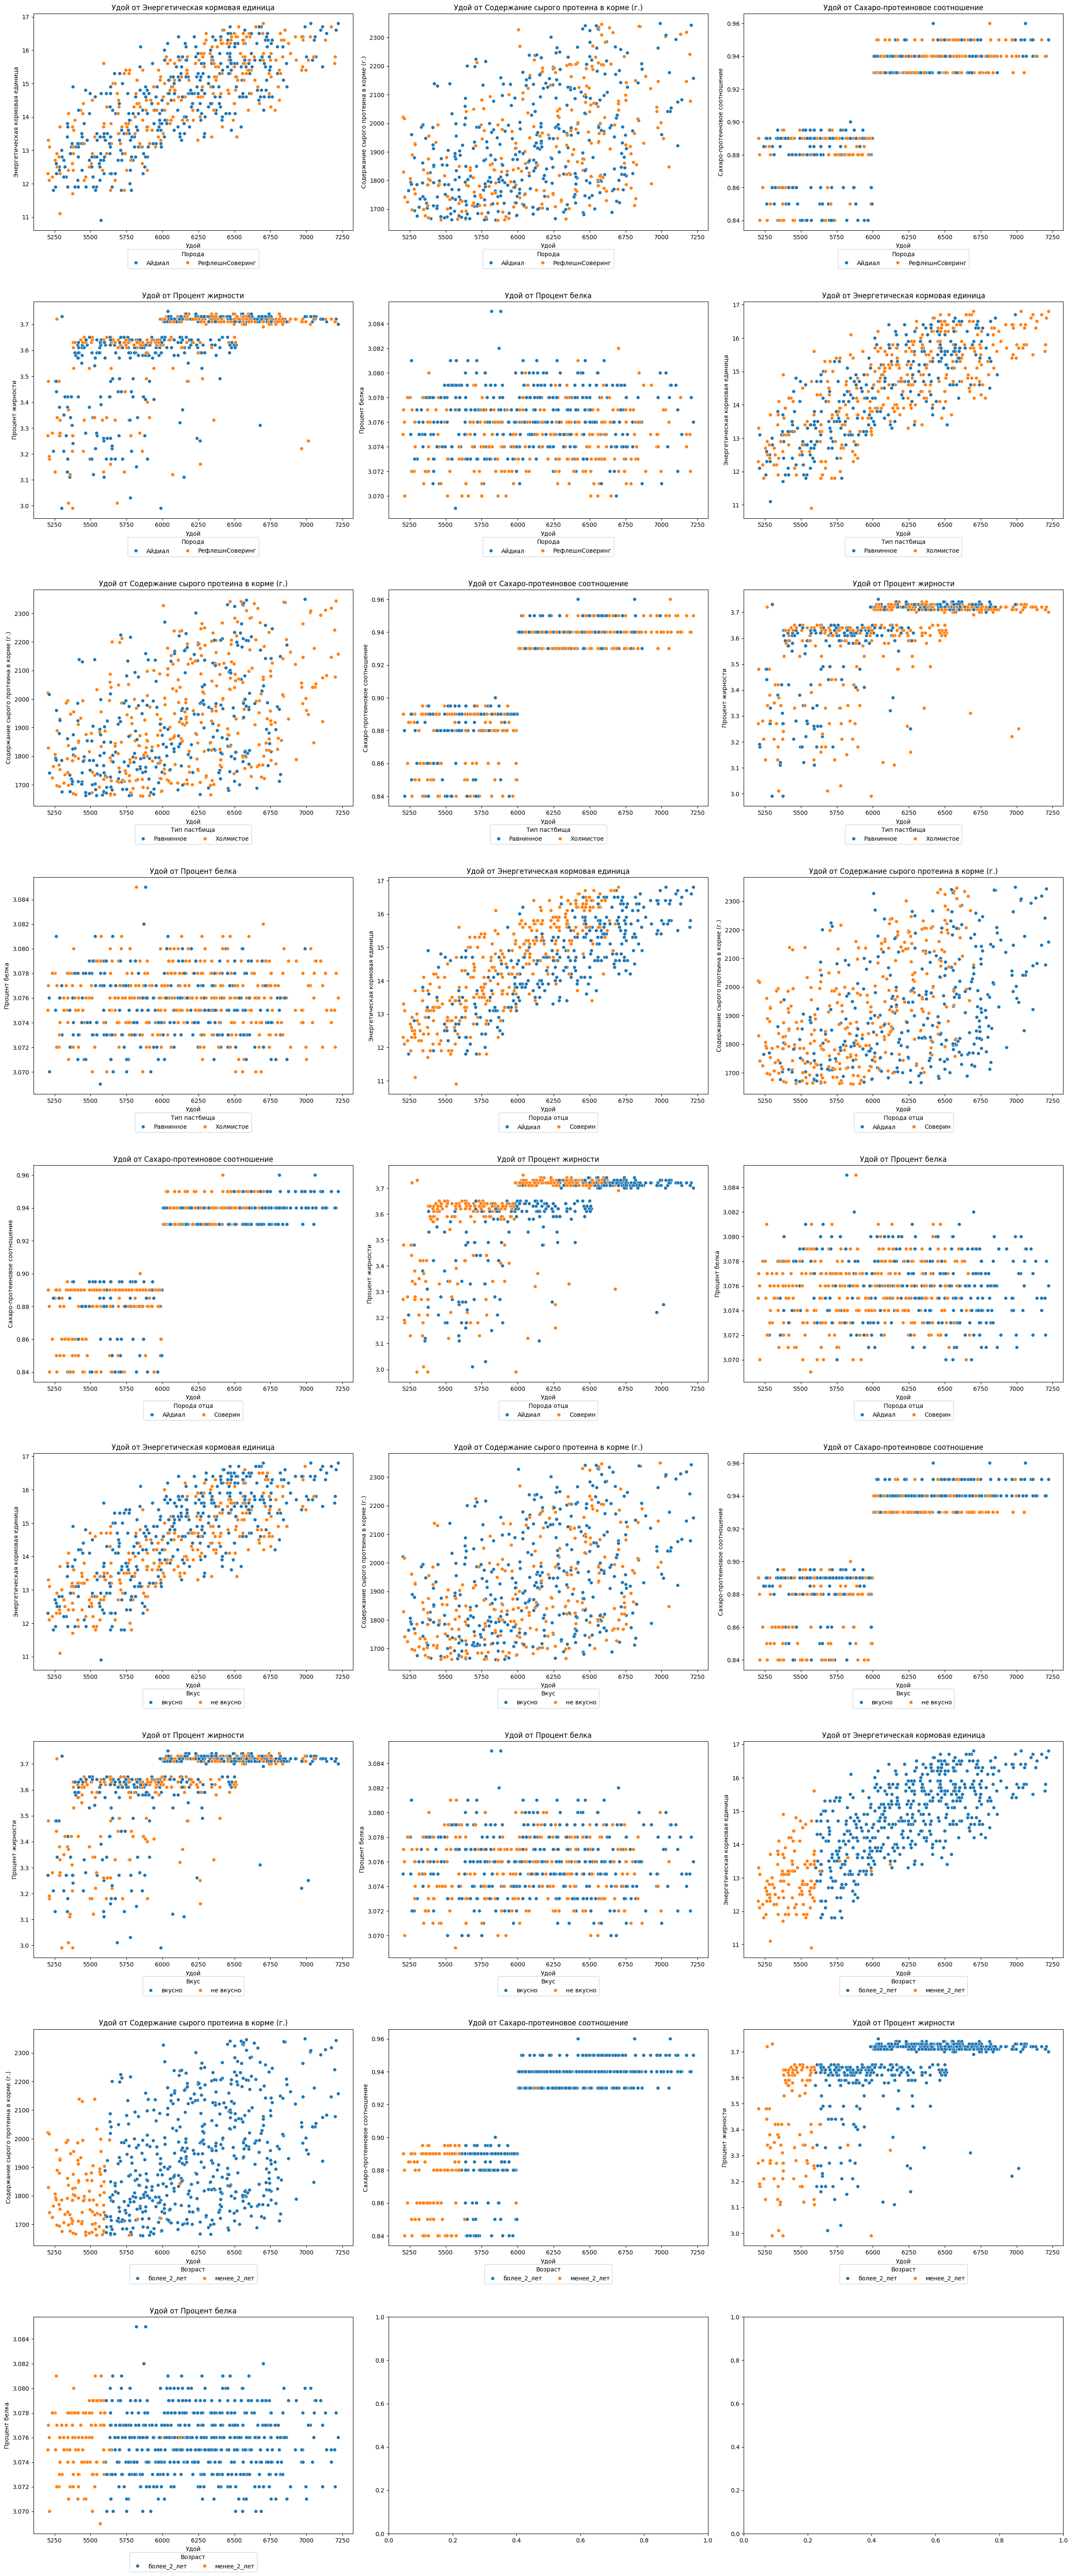

In [78]:
x=0
fig, axes = plt.subplots(9,3, figsize=(25, 60), constrained_layout=True)
fig.tight_layout(h_pad=10,w_pad=3)
axes = axes.ravel()

for c in MAIN_CAT_COL:
    for col in list(MAIN_NUM_COL.keys())[1:]:
        ax = sns.scatterplot(data=df_main, x='yield', y=col, hue=c, ax=axes[x])
        ax.set(xlabel='Удой', ylabel=MAIN_NUM_COL[col], title=('Удой от ' + MAIN_NUM_COL[col]))
        ax.get_legend().set_title(MAIN_CAT_COL[c])
        sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, -0.19), ncol=3, title=MAIN_CAT_COL[c], frameon=True)
        x+=1

## Вывод  
   Устойчивая корреляция наблюдается между удоем и СПО и ЭКЕ, слабеи коррелирует с процентом жирности и массой белка. 
Графики показывают линейную зависимость удоя от ЭКЕ и СПО. Наблюается некая аномалия в графиках с СПО - область делится на два участка, предполагаю, что это говорит о двух типах корма разного качества. По графикам можно заметить, что для всех коров возрастом более 2 лет характерны бОльшие удои. Графики оценивающие процент белка "рассечены" причиной этому ограничение количества знаков в переменной. В графиках с процентом жирности наблюдаются две линии плотности в районе 3.6 и 3.7%, а ниже равномерно распределенные данные. Я считаю, что это из-за особенностей сбора данных. Некоторые собирающие данные для простоты выполнения задачи округляют их в уме до десятков.   
   В дальнейших вычислениях, я полагаю будет целесообразным, признак СПО конвертировать из количественного в категриальный разделив на "КормА" и "КормБ" 

# 4. Обучение и настройка модели

## Преамбула

### Первая модель  
В качестве целевого признака по условию я использую Удой. Для обучающих признаков я отобрал следующие:  
|Признак |Причина|  
|:-------|:------|
|ЭКЕ (Энергетическая кормовая единица)|Видна линейная связь на графиках и в корреляции|
|Сырой протеин, г|Свзяли видна на графиках|
|СПО (Сахаро-протеиновое соотношение)|Видна линейная связь на графиках и в корреляции|
|Порода|В числах связи не наблюдаю, но по логике бывают как мясные там и молочные породы|
|Тип пастбища|На некоторых графиках можно заметить, что для холмистого пастбища удои выше|
|порода папы_быка|Логичный параметр и подтверждатеся графиками|
|Возраст|Графики указывают на бОльший удой для старших коров|  

Разобью датасет на тренировочную и тестовую выборки:


In [80]:
X_columns = ['eke', 'protein_weight', 'spo', 'breed', 'pasture_type', 'breed_dad', 'protein_per', 'age']
X_train, X_test, y_train, y_test = tts(
    df_main[X_columns], 
    df_main['yield'], 
    random_state=RANDOM_STATE
)
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train)
X_test_ohe = encoder.transform(X_test)
scaler = StandartScaler()
X_train_scaler = scaler.fit_transform(X_test_ohe)
X_test_scaler = scaler.transform(X_test_ohe)

## Вывод

# 5. Тестирование модели

## Преамбула

## Вывод

# 6. Вывод